# Titanic Survival Prediction 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
df=pd.read_csv("C:\\Users\\rajjv\\Downloads\\archive\\titanic_survival_tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
df.shape

(418, 12)

In [39]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [42]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
#handling missing values
df=df.drop(columns='Cabin',axis=1)

In [44]:
#handling missing value cloumn Age
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [45]:
#Handling Fare missing value
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [46]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
#Data Analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [53]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

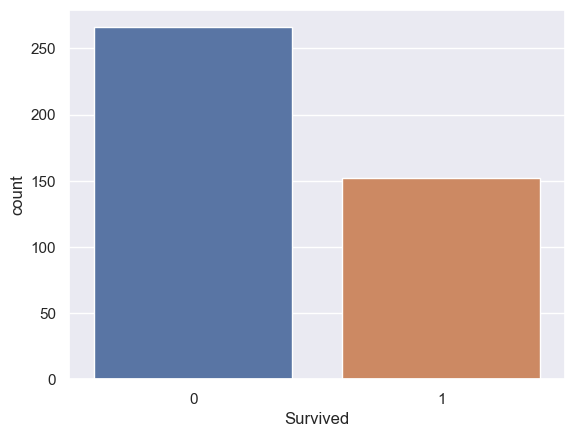

In [60]:
#making a count plot for "Survived" column
sns.countplot(x='Survived', data=df)

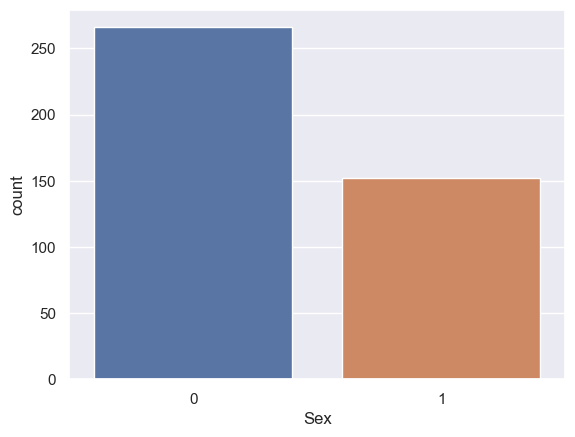

In [97]:
#making a count plot for "Sex" column
sns.countplot(x='Sex', data=df)

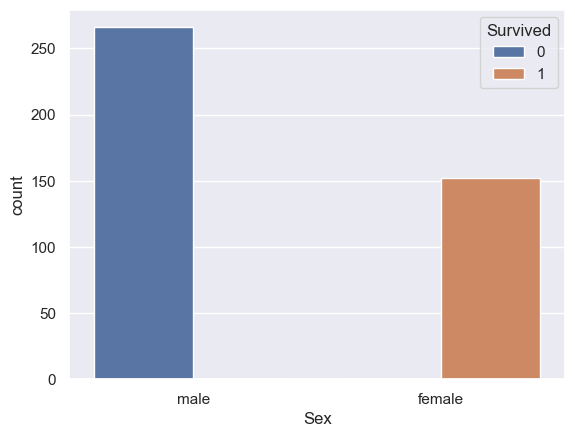

In [68]:
#number of survivers gender wise
sns.countplot(x='Sex', data=df, hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

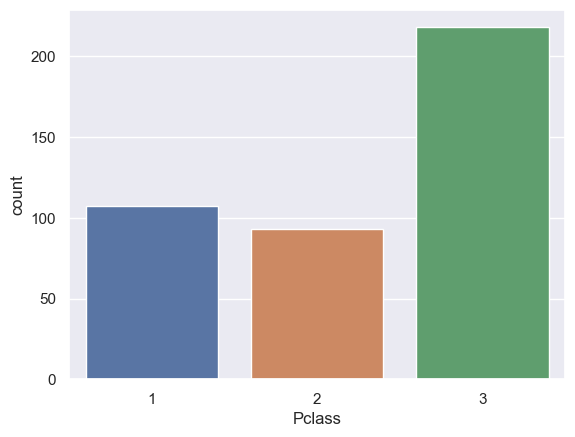

In [69]:
#making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

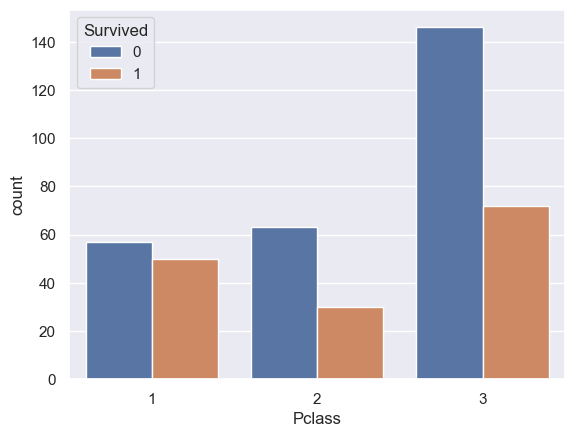

In [72]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [73]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [74]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [75]:
#converting catagorical Columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}},inplace=True)

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [78]:
#dependent and independent variables (Features)
X=df.drop(columns=['PassengerId','Name', 'Ticket', 'Survived'],axis=1)
y=df['Survived']

In [79]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [80]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [109]:
#Spliting training and testing data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [110]:
print(X.shape,X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [111]:
print(y.shape, y_train.shape, y_test.shape)

(418,) (334,) (84,)


In [112]:
#use model
model=LogisticRegression()

In [113]:
#training logistic regression model with training data
model.fit(X_train,y_train)

LogisticRegression()

In [114]:
#Accuracy on training data
X_train_pred=model.predict(X_train)

In [115]:
print(X_train_pred)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [116]:
training_data_accuracy=accuracy_score(y_train,X_train_pred)
print("Accuracy score of training data: ",training_data_accuracy)

Accuracy score of training data:  1.0


In [117]:
X_test_pred=model.predict(X_test)

In [118]:
print(X_test)

     Pclass  Sex       Age  SibSp  Parch     Fare  Embarked
146       1    0  30.27259      0      0  51.8625         0
223       3    0  21.00000      0      0   7.7958         0
193       2    0  61.00000      0      0  12.3500         2
305       1    1  64.00000      1      1  26.5500         0
188       3    1  30.27259      8      2  69.5500         0
..      ...  ...       ...    ...    ...      ...       ...
348       2    0  24.00000      0      0  13.5000         0
30        2    0  50.00000      1      0  26.0000         0
174       3    0  40.00000      1      5  31.3875         0
68        1    0  31.00000      0      0  28.5375         1
204       2    0  25.00000      0      0  10.5000         0

[84 rows x 7 columns]


In [119]:
testing_data_accuracy=accuracy_score(y_test,X_test_pred)
print("Accuracy score of testing data: ",testing_data_accuracy)

Accuracy score of testing data:  1.0


In [120]:
y_pred=model.predict(X_test)

In [121]:
print(y_pred)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [123]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[51  0]
 [ 0 33]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [125]:
# Visualize coefficients (feature importance) for logistic regression
coefficients = model.coef_[0]
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print("\nCoefficients:\n", sorted_coefficients_df)


Coefficients:
     Feature  Coefficient
1       Sex     6.301374
6  Embarked     0.215462
4     Parch     0.172046
3     SibSp     0.019971
5      Fare     0.002370
2       Age    -0.005629
0    Pclass    -0.088518


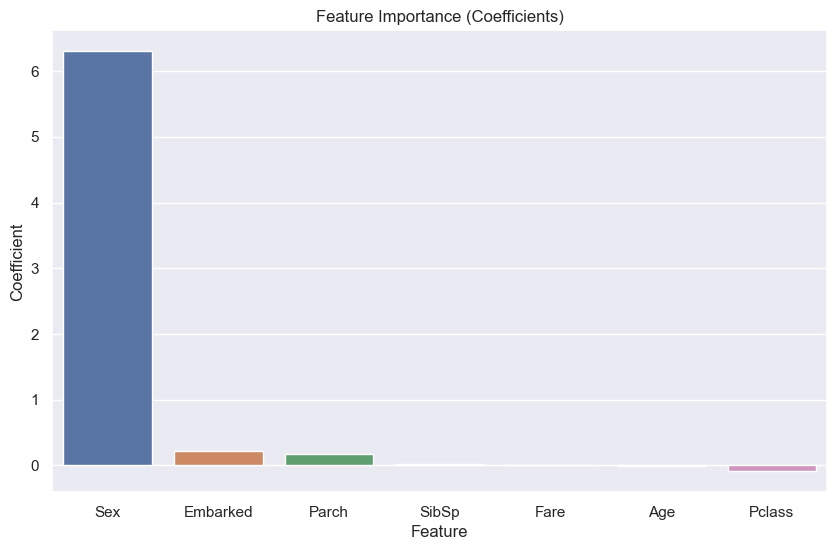

In [127]:
# Visualize Feature Importance (Coefficients)
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature',y='Coefficient', data=sorted_coefficients_df)
plt.title('Feature Importance (Coefficients)')
plt.show()

In [147]:
#Single Passenger data for prediction (is survive or not)
new_passenger_data = pd.DataFrame({
    'Pclass': [0],  # Passenger class (0 for no, 1 for yes)
    'Sex': [1],  # Gender (1 for male, 0 for female)
    'Age': [22],  # Age of the passenger
    'SibSp': [1],  # Number of siblings/spouses aboard
    'Parch': [0],  # Number of parents/children aboard
    'Fare': [300],  # Fare paid by the passenger
    'Embarked': [0]  # Embarked from Queenstown (0 for S, 1 for C, 2 for Q)
})

# Make a prediction for the single passenger
prediction = model.predict(new_passenger_data)

print("Passenger Survided or not. Yes: 1, No: 0 -->")
print(prediction[0])


Passenger Survided or not. Yes: 1, No: 0 -->
1
